# Panji Jonatan Situmorang

# 12S16013

## Exercise1 | Clustering with K-Means

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ('D:/SEMESTER 7/praktikum cluster naalisi/loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


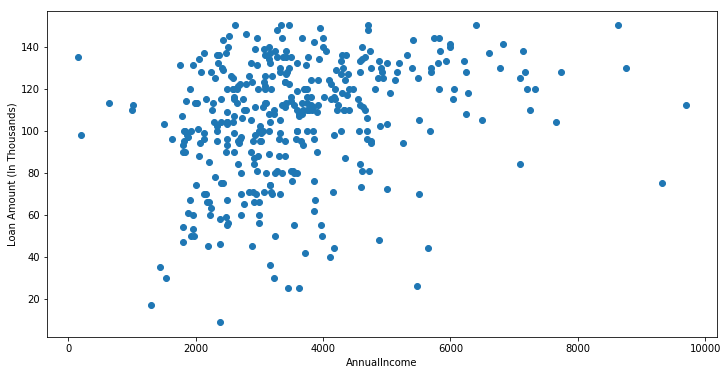

In [3]:
X = data[["ApplicantIncome", "LoanAmount"]]

plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"])
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

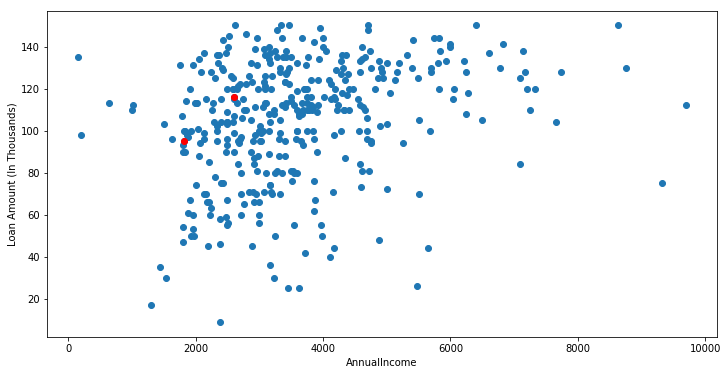

In [4]:
K=2

Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"])
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [5]:
diff = 1
j =0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
            
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids ['LoanAmount']).sum() + \
        (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


805.0545061314924
586.1365952417359
438.0286363341268
301.1925634025398
250.6170057441181
136.80289802209285
62.590911244685984
0.0


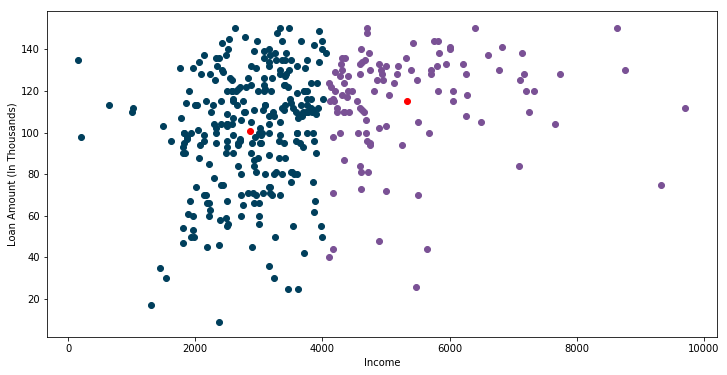

In [6]:
color=['#003f5c', '#7a5195']
plt.figure(figsize=(12,6))

for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
    
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# Exercise1.2| Using scikit-learn

In [7]:
import pandas as pd
import numpy as nt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv ('D:/SEMESTER 7/praktikum cluster naalisi/loan_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [11]:
sltd_data = data[["ApplicantIncome", "LoanAmount"]]

sltd_data.describe()

,ApplicantIncome,LoanAmount
count,381.000000,381.000000
mean,3579.845144,104.986877
std,1419.813818,28.358464
min,150.000000,9.000000
25%,2600.000000,90.000000
50%,3333.000000,110.000000
75%,4288.000000,127.000000
max,9703.000000,150.000000


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

pd.DataFrame(data_scaled).describe()

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1
count,3.810000e+02,3.810000e+02
mean,9.994921e-17,-9.179009e-17
std,1.001315e+00,1.001315e+00
min,-2.418877e+00,-3.389221e+00
25%,-6.910297e-01,-5.291748e-01
50%,-1.740860e-01,1.770094e-01
75%,4.994218e-01,7.772660e-01
max,4.318317e+00,1.589378e+00


(-4, 5)

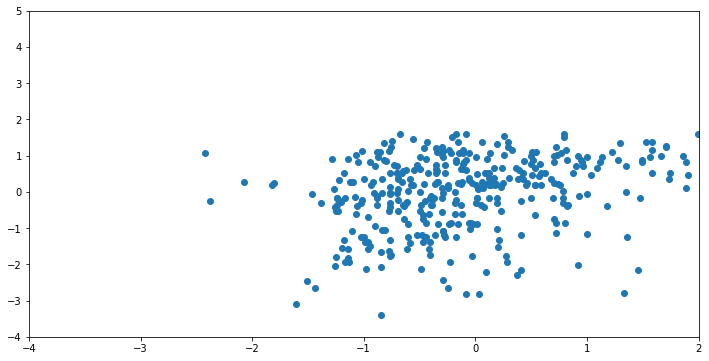

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [18]:
kmeans = KMeans(n_clusters=2, init='random')

kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_km = kmeans.fit_predict(data_scaled)

In [20]:
kmeans.inertia_

453.5681659194928

Text(0, 0.5, 'Inertia')

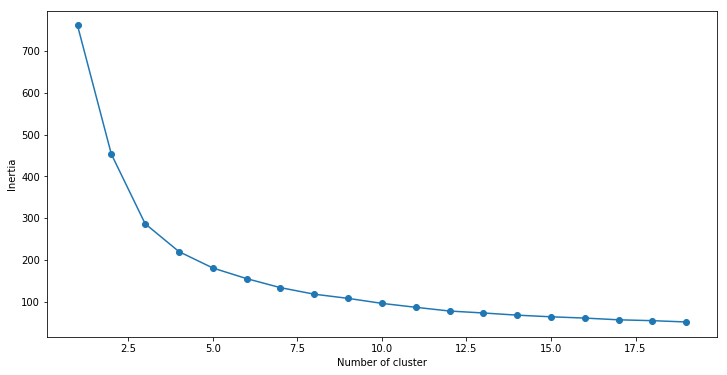

In [23]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')

In [26]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)